In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Template matching
If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

# Analysis 

For our analysis : cv.TM_CCOEFF is giving the right location of the template. 

hypothesis : 
reading an image in color combination will increase proximity. 

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

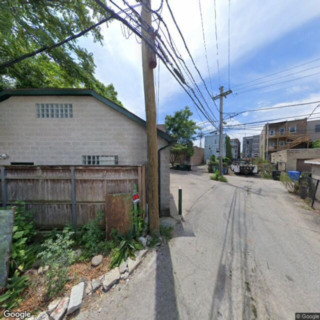

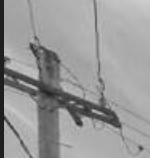

In [ ]:
# load image and template 
img = cv.pyrDown(cv.imread('/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Train/With UPC /gsv_341.jpg', cv.IMREAD_UNCHANGED))

img2 = img.copy()
cv2_imshow(img2)
template = cv.imread('/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/temp.png',0)
cv2_imshow(template)

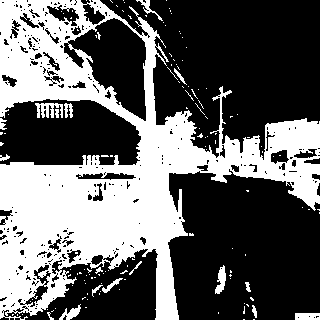

In [ ]:
ret, threshed_img = cv.threshold(cv.cvtColor(img, cv.COLOR_BGR2GRAY),115, 255, cv.THRESH_BINARY_INV)
cv2_imshow(threshed_img)

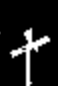

In [ ]:
template = cv.imread('/content/gdrive/Shareddrives/ComED Codes and Data/Contour and HOG/edited template.png',0)
cv2_imshow(template)

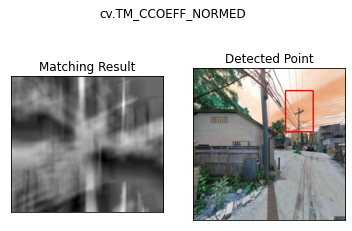

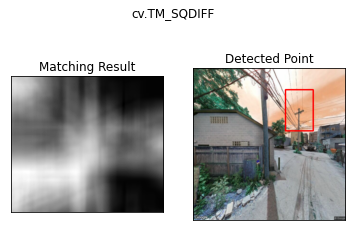

In [ ]:
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = [
  # 'cv.TM_CCOEFF',
  'cv.TM_CCOEFF_NORMED', 
  # 'cv.TM_CCORR',
  # 'cv.TM_CCORR_NORMED', 
  'cv.TM_SQDIFF', 
  # 'cv.TM_SQDIFF_NORMED'
            ]
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(threshed_img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# the model runs from here 

In [ ]:
image_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Train/With UPC /gsv_341.jpg'
template_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Contour and HOG/main_template.png'

def get_matching(image_location, template_location):
  img = cv.pyrDown(cv.imread(image_location, cv.IMREAD_UNCHANGED))
  img2 = img.copy()
  cv2_imshow(img2)
  template = cv.imread(template_location,0)
  cv2_imshow(template)
  ret, threshed_img = cv.threshold(cv.cvtColor(img, cv.COLOR_BGR2GRAY),115, 255, cv.THRESH_BINARY_INV)
  cv2_imshow(threshed_img)
  w, h = template.shape[::-1]
  # All the 6 methods for comparison in a list
  methods = [
  # 'cv.TM_CCOEFF',
  'cv.TM_CCOEFF_NORMED', 
  # 'cv.TM_CCORR',
  # 'cv.TM_CCORR_NORMED', 
  'cv.TM_SQDIFF', 
  # 'cv.TM_SQDIFF_NORMED'
            ]
  for meth in methods:
      img = img2.copy()
      method = eval(meth)
      # Apply template Matching
      res = cv.matchTemplate(threshed_img,template,method)
      min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
      # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
      if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
          top_left = min_loc
      else:
          top_left = max_loc
      bottom_right = (top_left[0] + w, top_left[1] + h)
      cv.rectangle(img,top_left, bottom_right, 255, 2)
      plt.subplot(121),plt.imshow(res,cmap = 'gray')
      plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
      plt.subplot(122),plt.imshow(img,cmap = 'gray')
      plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
      plt.suptitle(meth)
      plt.show()

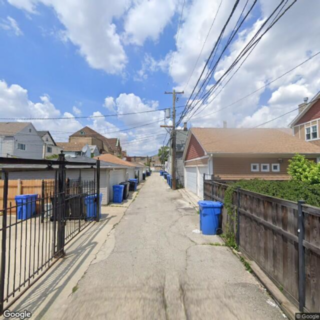

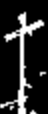

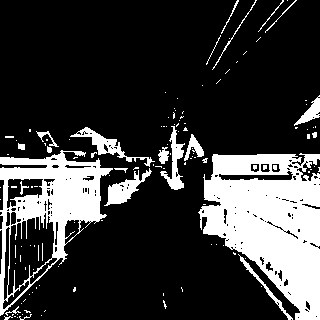

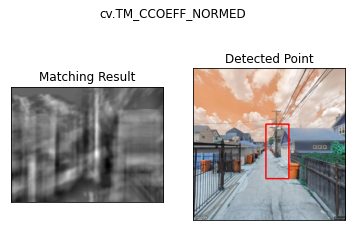

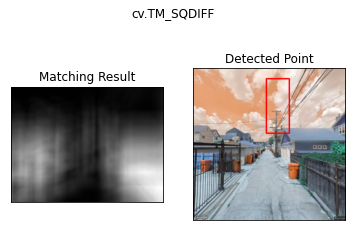

In [ ]:
image_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Images/With UPC/Copy of gsv_456.jpg'

get_matching(image_location, template_location)

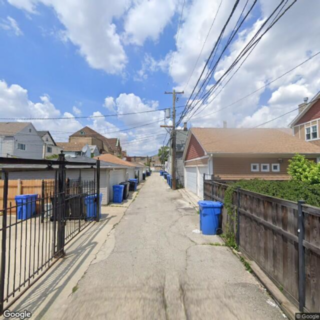

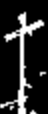

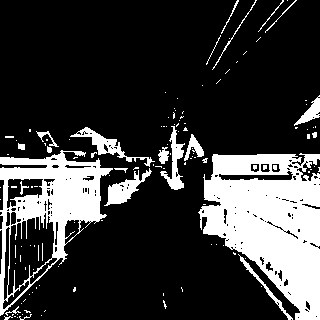

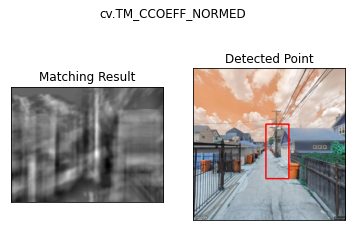

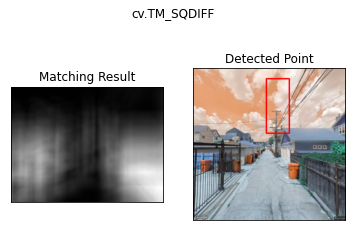

In [ ]:

image_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Images/With UPC/Copy of gsv_456.jpg'

get_matching(image_location, template_location)

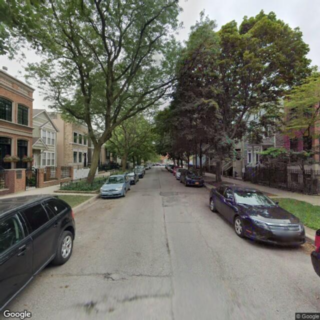

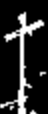

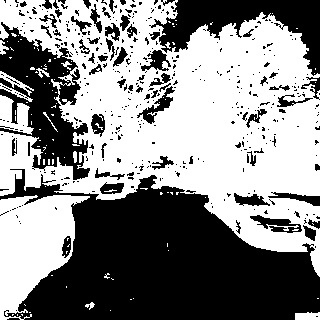

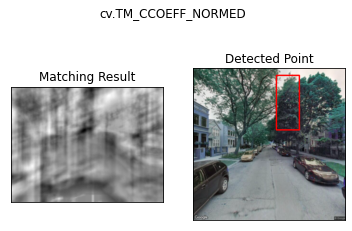

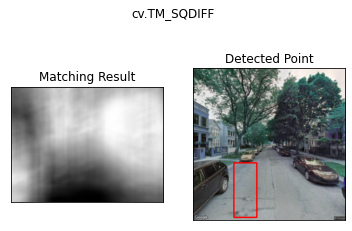

In [ ]:
# '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Images/With UPC/gsv_1515.jpg'

image_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Images/Without UPC/gsv_356.jpg'

get_matching(image_location, template_location)

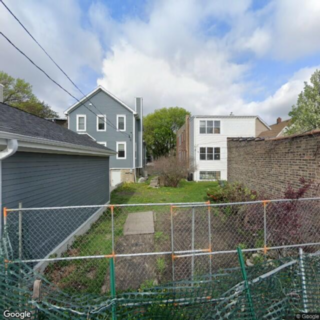

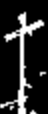

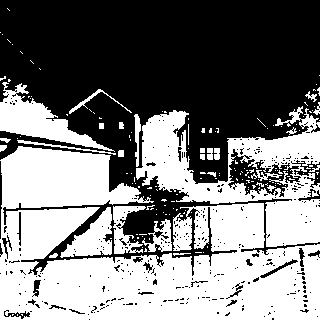

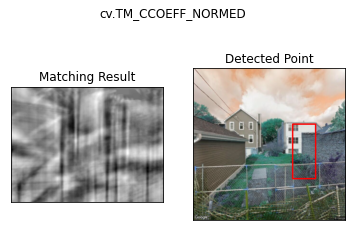

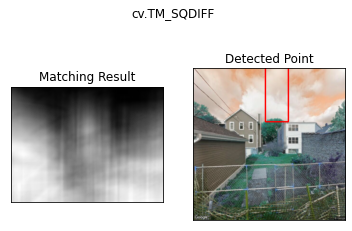

In [ ]:
image_location = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Images/Without UPC/gsv_486.jpg'

get_matching(image_location, template_location)